In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
from citipy import citipy

In [4]:
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | marawi
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | walsrode
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | garowe
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | idrinskoye
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | sabang
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | mega
Processing Record 18 of Set 1 | petrovskoye
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | sur
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | mandurah
Processing Record 24 of Set 1 | sistranda


Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | jinchengjiang
City not found. Skipping...
Processing Record 43 of Set 4 | flin flon
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | bengkulu
Processing Record 46 of Set 4 | empangeni
Processing Record 47 of Set 4 | vsevolodo-vilva
City not found. Skipping...
Processing Record 48 of Set 4 | mali
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | odesskoye
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | bohl-iggelheim
Processing Record 3 of Set 5 | daura
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | saint george
Processing Record 6 of Set 5 | westport
Processing Record 7 of Set 5 | chilca
Processing Record 8 of Set 5 | zhigansk
Processing Record 9 of Set 5 | sept-iles
Processing Record 10 of Set 5 | marsh harbour
Processing Record 11 of Set 5

Processing Record 31 of Set 8 | maun
Processing Record 32 of Set 8 | coihaique
Processing Record 33 of Set 8 | ambon
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | namibe
Processing Record 37 of Set 8 | ilulissat
Processing Record 38 of Set 8 | port lincoln
Processing Record 39 of Set 8 | xocali
Processing Record 40 of Set 8 | bucerias
Processing Record 41 of Set 8 | antonina
Processing Record 42 of Set 8 | kambove
Processing Record 43 of Set 8 | yakima
Processing Record 44 of Set 8 | evensk
Processing Record 45 of Set 8 | pangkalanbuun
Processing Record 46 of Set 8 | spassk-dalniy
Processing Record 47 of Set 8 | indapur
Processing Record 48 of Set 8 | praia
Processing Record 49 of Set 8 | rybinsk
Processing Record 50 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 1 of Set 9 | tekeli
Processing Record 2 of Set 9 | karlstad
Processing Record 3 of Set 9 | esso
Processing Record 4 of Set 9 | scott

Processing Record 17 of Set 12 | puerto del rosario
Processing Record 18 of Set 12 | talas
Processing Record 19 of Set 12 | havoysund
Processing Record 20 of Set 12 | jablah
Processing Record 21 of Set 12 | nueva helvecia
Processing Record 22 of Set 12 | teguise
Processing Record 23 of Set 12 | lufilufi
Processing Record 24 of Set 12 | constantine
Processing Record 25 of Set 12 | satitoa
City not found. Skipping...
Processing Record 26 of Set 12 | diamantino
Processing Record 27 of Set 12 | huarmey
Processing Record 28 of Set 12 | kavaratti
Processing Record 29 of Set 12 | kem
Processing Record 30 of Set 12 | liancheng
Processing Record 31 of Set 12 | manavalakurichi
Processing Record 32 of Set 12 | carlisle
Processing Record 33 of Set 12 | lais
Processing Record 34 of Set 12 | andselv
City not found. Skipping...
Processing Record 35 of Set 12 | ibra
Processing Record 36 of Set 12 | kyren
Processing Record 37 of Set 12 | ranipur
Processing Record 38 of Set 12 | kaoma
Processing Record 

In [ ]:
city_data_length = len(city_data)
city_data_length

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0       Marawi   7.9986  124.2928     70.11        95         100        0.83   
1    Upernavik  72.7868  -56.1549     24.82        78         100        4.25   
2     Walsrode  52.8667    9.6000     67.01        57          13        8.41   
3       Hobart -42.8794  147.3294     42.66        85          40        1.14   
4  East London -33.0153   27.9116     67.14        63           0       10.36   
5   Chokurdakh  70.6333  147.9167     19.78        95          80        6.62   
6    Jamestown  42.0970  -79.2353     56.17        50           0        5.75   
7       Garowe   8.4054   48.4845     84.96        44          87       17.63   
8      Rikitea -23.1203 -134.9692     69.89        60          84       23.11   
9    Ostrovnoy  68.0531   39.5131     43.09        95         100       17.94   

  Country                 Date  
0      PH  2022-10-04 15:22:48  
1      GL  2022-10-04 15:22:49  
2      DE  2022-10-04 15:22:50  
3      AU  2022-10-04 15:14:29  
4      ZA  2022-10-04 15:22:50  
5      RU  2022-10-04 15:16:07  
6      US  2022-10-04 15:22:48  
7      SO  2022-10-04 15:22:51  
8      PF  2022-10-04 15:14:20  
9      RU  2022-10-04 15:22:51

In [23]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

City Country                 Date      Lat       Lng  Max Temp  \
0         Marawi      PH  2022-10-04 15:22:48   7.9986  124.2928     70.11   
1      Upernavik      GL  2022-10-04 15:22:49  72.7868  -56.1549     24.82   
2       Walsrode      DE  2022-10-04 15:22:50  52.8667    9.6000     67.01   
3         Hobart      AU  2022-10-04 15:14:29 -42.8794  147.3294     42.66   
4    East London      ZA  2022-10-04 15:22:50 -33.0153   27.9116     67.14   
..           ...     ...                  ...      ...       ...       ...   
563       Broome      US  2022-10-04 15:39:26  42.2506  -75.8330     51.85   
564       Tamayo      DO  2022-10-04 15:39:27  18.3947  -71.2029     87.51   
565  Newtownards      GB  2022-10-04 15:39:27  54.5924   -5.6909     60.53   
566      Kahului      US  2022-10-04 15:39:28  20.8947 -156.4700     75.85   
567          Gap      FR  2022-10-04 15:39:28  44.6667    6.0000     62.83   

     Humidity  Cloudiness  Wind Speed  
0          95         100        0.83  
1          78         100        4.25  
2          57          13        8.41  
3          85          40        1.14  
4          63           0       10.36  
..        ...         ...         ...  
563        79         100       10.36  
564        79          20       11.50  
565        80          75        3.44  
566        86         100        8.05  
567        43          30        2.55  

[568 rows x 9 columns]

In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

City_ID         City Country                 Date      Lat       Lng  \
0        0       Marawi      PH  2022-10-04 15:22:48   7.9986  124.2928   
1        1    Upernavik      GL  2022-10-04 15:22:49  72.7868  -56.1549   
2        2     Walsrode      DE  2022-10-04 15:22:50  52.8667    9.6000   
3        3       Hobart      AU  2022-10-04 15:14:29 -42.8794  147.3294   
4        4  East London      ZA  2022-10-04 15:22:50 -33.0153   27.9116   

   Max Temp  Humidity  Cloudiness  Wind Speed  
0     70.11        95         100        0.83  
1     24.82        78         100        4.25  
2     67.01        57          13        8.41  
3     42.66        85          40        1.14  
4     67.14        63           0       10.36

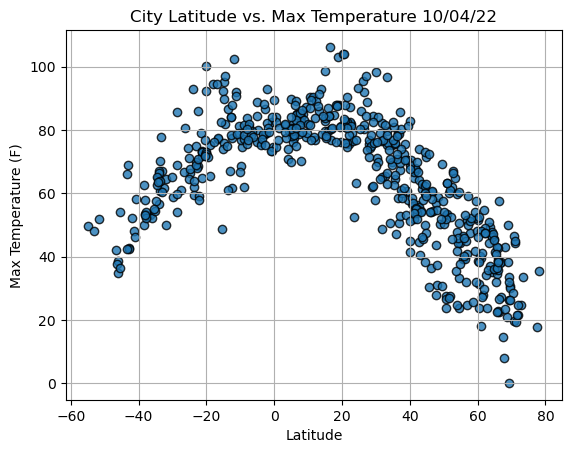

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

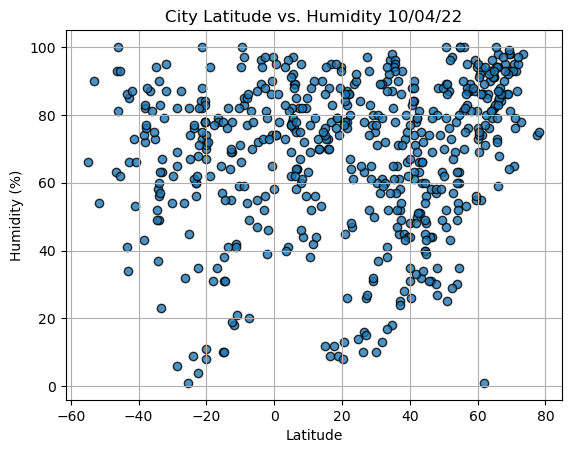

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

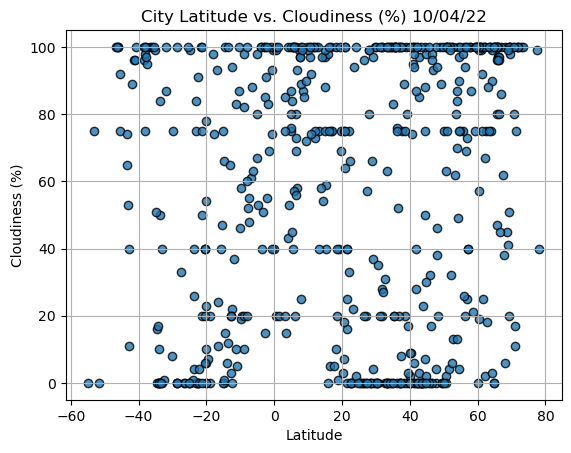

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

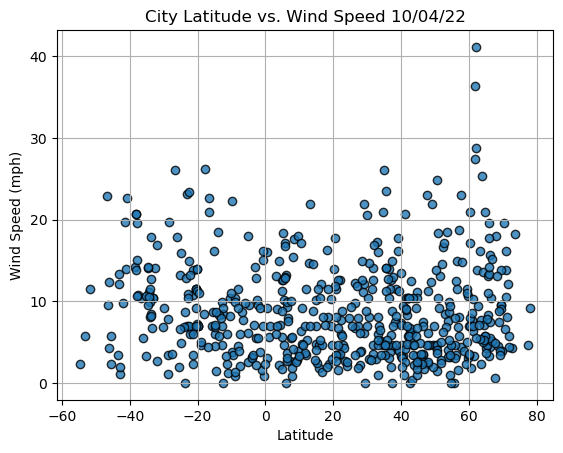

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()